# DOG vs CAT CLASSIFIER

In [ ]:
from google.colab import drive
drive.mount("drive")

Mounted at drive


## Dataset form Kaggle

In [ ]:
import kagglehub


path = kagglehub.dataset_download("ashfakyeafi/cat-dog-images-for-classification")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'cat-dog-images-for-classification' dataset.
Path to dataset files: /kaggle/input/cat-dog-images-for-classification


In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [ ]:
!ls /kaggle/input/cat-dog-images-for-classification

cat_dog  cat_dog.csv


In [ ]:
base_path="/kaggle/input/cat-dog-images-for-classification/"

In [ ]:
df=pd.read_csv(base_path+"cat_dog.csv")
df["labels"]=df["labels"].astype(str)
df.head(10)

,image,labels
0,dog.11289.jpg,1
1,cat.10836.jpg,0
2,cat.7970.jpg,0
3,cat.2212.jpg,0
4,dog.2653.jpg,1
5,dog.3051.jpg,1
6,cat.6006.jpg,0
7,cat.3234.jpg,0
8,cat.4132.jpg,0
9,dog.6482.jpg,1


## Data Augmentation

In [ ]:
data_gen=ImageDataGenerator(
    rescale=1/255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.1
    )

## Data Split in Train-Val 90-10 %

In [ ]:
image_size = (60, 60)
batch_size = 32

In [ ]:
train_generator = data_gen.flow_from_dataframe(
    dataframe=df,
    directory=base_path + "cat_dog",
    x_col='image',
    y_col='labels',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = data_gen.flow_from_dataframe(
    dataframe=df,
    directory=base_path + "cat_dog",
    x_col='image',
    y_col='labels',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 22500 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


## Model Implementation

In [ ]:
model = Sequential([
    layers.InputLayer(input_shape=(60,60,3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 58, 58, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 58, 58, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 27, 27, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 11, 11, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 9, 9, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 9, 9, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,291,841 (4.93 MB)

 Trainable params: 1,291,137 (4.93 MB)

 Non-trainable params: 704 (2.75 KB)

## Model Training

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples ,
    callbacks=callbacks
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
  704/22500 ━━━━━━━━━━━━━━━━━━━━ 30:44 85ms/step - accuracy: 0.6071 - loss: 0.8120

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


22500/22500 ━━━━━━━━━━━━━━━━━━━━ 74s 3ms/step - accuracy: 0.6380 - loss: 0.7042 - val_accuracy: 0.6788 - val_loss: 0.5938 - learning_rate: 1.0000e-04
Epoch 2/20
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - accuracy: 0.7062 - loss: 0.5643 - val_accuracy: 0.7280 - val_loss: 0.5348 - learning_rate: 1.0000e-04
Epoch 3/20
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - accuracy: 0.7457 - loss: 0.5131 - val_accuracy: 0.7596 - val_loss: 0.4942 - learning_rate: 1.0000e-04
Epoch 4/20
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - accuracy: 0.7642 - loss: 0.4859 - val_accuracy: 0.7692 - val_loss: 0.4893 - learning_rate: 1.0000e-04
Epoch 5/20
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - accuracy: 0.7807 - loss: 0.4622 - val_accuracy: 0.7644 - val_loss: 0.4902 - learning_rate: 1.0000e-04
Epoch 6/20
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - accuracy: 0.7902 - loss: 0.4419 - val_accuracy: 0.7724 - val_loss: 0.4808 - learning_rate: 1.0000e-04
Epoch 7/20
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 6

## Model Evalution Plot

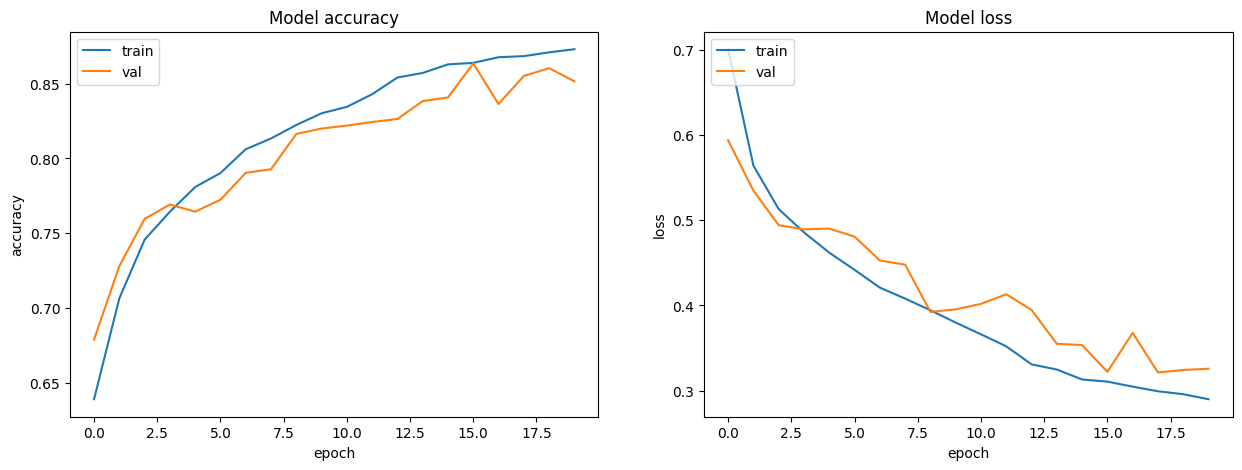

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].legend(['train', 'val'], loc='upper left')
ax[0].set_xlabel('epoch')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'val'], loc='upper left')

plt.show()

In [ ]:
model.save("/content/drive/MyDrive/models/cat_dog.keras")

## Model Prediction Test on New Image

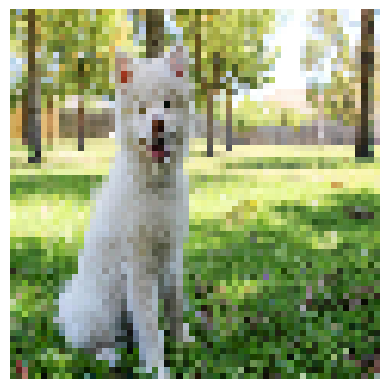

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
99.67
Dog


In [4]:
train_image ="/content/drive/MyDrive/content/images/pexels-pixabay-247937.jpg"

train_image = tf.keras.preprocessing.image.load_img(train_image, target_size=(60, 60))
train_image = tf.keras.preprocessing.image.img_to_array(train_image)
train_image = train_image / 255.0
train_image = tf.expand_dims(train_image, axis=0)

# Peredict image :
plt.imshow(train_image[0])
plt.axis('off')
plt.show()

prediction = model.predict(train_image)
print(f"{prediction[0][0]*100:.2f}")
if prediction[0][0] > 0.5:
  print("Dog")
else:
  print("Cat")


# TRANSFER LEARNING
Using vgg16 for in sequential model so that accuracy may increase

In [ ]:
#Image Size must be according to VGG16 :

image_size = (112, 112)
batch_size = 32


train_generator = data_gen.flow_from_dataframe(
    dataframe=df,
    directory=base_path + "cat_dog",
    x_col='image',
    y_col='labels',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = data_gen.flow_from_dataframe(
    dataframe=df,
    directory=base_path + "cat_dog",
    x_col='image',
    y_col='labels',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 22500 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


## Imports

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

## Pretrained Model Load (VGG16)

In [ ]:
vgg16_model= VGG16()
mobilenet_model= MobileNetV2()

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:

base_model = MobileNetV2(input_shape=(image_size[0], image_size[1], 3),
                          include_top=False,
                          weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False

model2 = Sequential([
    base_model,
    Flatten(),
    Dense(1, activation='sigmoid')
])

/tmp/ipython-input-2451438815.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(image_size[0], image_size[1], 3),


In [ ]:

model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 20480)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │        20,481 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,278,465 (8.69 MB)

 Trainable params: 20,481 (80.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
model2.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Dog



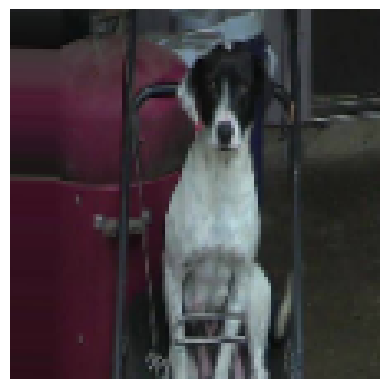

In [ ]:
# Get one batch from the generator
images, labels = next(train_generator)

# Display the first image in the batch
print("Cat" if labels[0]==0 else "Dog")
print()
plt.imshow(images[0])
plt.axis('off')
plt.show()


In [ ]:
model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples
)

Epoch 1/5
  704/22500 ━━━━━━━━━━━━━━━━━━━━ 59:22 163ms/step - accuracy: 0.9200 - loss: 0.2065

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


22500/22500 ━━━━━━━━━━━━━━━━━━━━ 148s 7ms/step - accuracy: 0.9203 - loss: 0.2037 - val_accuracy: 0.9232 - val_loss: 0.1863
Epoch 2/5
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 118s 5ms/step - accuracy: 0.9282 - loss: 0.1824 - val_accuracy: 0.9184 - val_loss: 0.2147
Epoch 3/5
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 120s 5ms/step - accuracy: 0.9279 - loss: 0.1833 - val_accuracy: 0.9220 - val_loss: 0.1918
Epoch 4/5
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 119s 5ms/step - accuracy: 0.9336 - loss: 0.1666 - val_accuracy: 0.9228 - val_loss: 0.2080
Epoch 5/5
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 118s 5ms/step - accuracy: 0.9347 - loss: 0.1645 - val_accuracy: 0.9228 - val_loss: 0.1875


## Model Prediction Test on New Image

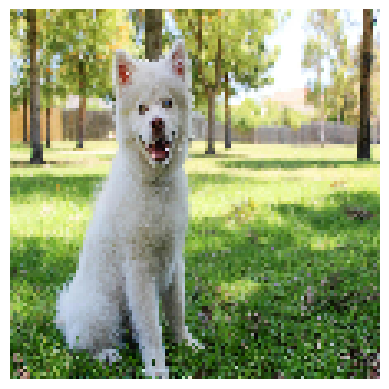

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
99.89
Dog


In [ ]:
train_image ="/content/drive/MyDrive/content/images/pexels-pixabay-247937.jpg"

train_image = tf.keras.preprocessing.image.load_img(train_image, target_size=(112, 112))
train_image = tf.keras.preprocessing.image.img_to_array(train_image)
train_image = train_image / 255.0
train_image = tf.expand_dims(train_image, axis=0)

# Peredict image :
plt.imshow(train_image[0])
plt.axis('off')
plt.show()

prediction = model2.predict(train_image)
print(f"{prediction[0][0]*100:.2f}")
if prediction[0][0] > 0.5:
  print("Dog")
else:
  print("Cat")
